In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
import plotly.express as px
import osmnx as ox
from adjustment_formula import *

## Importación de BBDD

### Manzanas y tiempos de viaje

In [2]:
manzanas = gpd.read_file('../data/lima_manzanas.gpkg')

In [3]:
manzanas_tiempos = gpd.read_file('../data/BBDD Perú accesibilidad/manzanas_y_tiempos_AM.geojson')

In [4]:
manzanas_tiempos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 145953 entries, 0 to 145952
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Mz                     145953 non-null  object  
 1   InputID                145953 non-null  object  
 2   TargetID               145953 non-null  int64   
 3   Distance               145953 non-null  float64 
 4   distancia_a_centro_05  141202 non-null  float64 
 5   duracion_a_centro_05   141202 non-null  float64 
 6   geometry               145953 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(2)
memory usage: 7.8+ MB


In [5]:
manzanas_tiempos = manzanas_tiempos.drop(columns="geometry")

In [6]:
manzanas_tiempos = manzanas_tiempos.rename(columns={"distancia_a_centro_05": "distancia_a_centro_am", "duracion_a_centro_05": "duracion_a_centro_am"})

In [7]:
print(manzanas.shape)
manzanas.head()

(124903, 31)


,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,...,CCPP,CCDI,NOMBDIST,CAPITAL,CODIGO,CNT_CCPP,DESCRIPCIO,layer,path,geometry
0,150102000102100023,150102,1,0001,02100,023,None,18.0,7.0,11.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723..."
1,150102000101101010,150102,1,0001,01101,010,None,31.0,14.0,17.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151..."
2,150102000100600037,150102,1,0001,00600,037,None,71.0,32.0,39.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981..."
3,150102000101202048,150102,1,0001,01202,048,None,12.0,5.0,7.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140..."
4,150102000101202010A,150102,1,0001,01202,010,A,2.0,0.0,2.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255..."


In [8]:
manzanas_merge = pd.merge(manzanas, manzanas_tiempos, on="Mz", how="left")

In [9]:
manzanas_merge

,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,...,CNT_CCPP,DESCRIPCIO,layer,path,geometry,InputID,TargetID,Distance,distancia_a_centro_am,duracion_a_centro_am
0,150102000102100023,150102,1,0001,02100,023,None,18.0,7.0,11.0,...,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",150102000102100023,111,1889.113655,2.7854,33.421667
1,150102000101101010,150102,1,0001,01101,010,None,31.0,14.0,17.0,...,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151...",150102000101101010,841,2291.062646,7.7934,93.521667
2,150102000100600037,150102,1,0001,00600,037,None,71.0,32.0,39.0,...,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981...",150102000100600037,840,347.438585,0.4401,5.280000
3,150102000101202048,150102,1,0001,01202,048,None,12.0,5.0,7.0,...,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140...",150102000101202048,841,2027.844261,7.2304,86.766667
4,150102000101202010A,150102,1,0001,01202,010,A,2.0,0.0,2.0,...,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",150102000101202010A,841,2138.211917,8.6044,103.258333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149464,151009000100100026A,151009,1,0001,00100,026,A,11.0,6.0,5.0,...,NaN,None,YAUYOS_LIMA_1510_Manzanas_Poblacion_JP_SuyoPom...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/YAUY...,"MULTIPOLYGON (((-75.86358 -12.91501, -75.86360...",151009000100100026A,143,112057.743757,419.9535,5039.515000
149465,151022004300000,151022,2,0043,00000,None,None,2.0,1.0,1.0,...,NaN,None,YAUYOS_LIMA_1510_Manzanas_Poblacion_JP_SuyoPom...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/YAUY...,"MULTIPOLYGON (((-76.16561 -12.43728, -76.16553...",151022004300000,704,66102.143212,173.5583,2082.741667
149466,151007000100100017,151007,1,0001,00100,017,None,8.0,4.0,4.0,...,NaN,None,YAUYOS_LIMA_1510_Manzanas_Poblacion_JP_SuyoPom...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/YAUY...,"MULTIPOLYGON (((-75.87091 -12.34471, -75.87092...",151007000100100017,704,97995.053803,211.6314,2572.025000
149467,151022002700000,151022,2,0027,00000,None,None,1.0,1.0,0.0,...,NaN,None,YAUYOS_LIMA_1510_Manzanas_Poblacion_JP_SuyoPom...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/YAUY...,"MULTIPOLYGON (((-76.29371 -12.52059, -76.29363...",151022002700000,704,54029.885308,184.5107,2214.206667


### Demanda

In [10]:
demanda = pd.read_csv("../data/BBDD Perú demanda/1_vm_limamet_pobma60_mz.csv")
print(demanda.shape)
demanda.head()

(55078, 7)


,id,ubigeo,nombdist,cod_mz,pobma60_mz,pobma60_dist,geom
0,9.0,150102,ANCON,150102000101101009B,5,1481,0106000020E6100000010000000103000000010000000D...
1,11.0,150102,ANCON,150102000101600020B,2,1481,0106000020E6100000010000000103000000010000000E...
2,12.0,150102,ANCON,150102000100500030,1,1481,0106000020E61000000100000001030000000100000005...
3,14.0,150102,ANCON,150102000100400044,2,1481,0106000020E61000000100000001030000000100000006...
4,15.0,150102,ANCON,150102000100200012,2,1481,0106000020E61000000100000001030000000100000009...


In [11]:
demanda.columns

Index(['id', 'ubigeo', 'nombdist', 'cod_mz', 'pobma60_mz', 'pobma60_dist',
       'geom'],
      dtype='object')

In [12]:
demanda_reduc = demanda[[ 'cod_mz', 'pobma60_mz', 'pobma60_dist']]
manzanas_merged = pd.merge(manzanas_merge, demanda_reduc, left_on="Mz", right_on="cod_mz", how="left")

manzanas_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 151541 entries, 0 to 151540
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Mz                     151541 non-null  object  
 1   UBIGEO                 151541 non-null  object  
 2   AREA                   151541 non-null  object  
 3   CODCCPP                151541 non-null  object  
 4   ZONA                   151541 non-null  object  
 5   MANZANA_ID             148783 non-null  object  
 6   MANZANA_A              53897 non-null   object  
 7   T_TOTAL                151541 non-null  float64 
 8   T_HOMBRES              151541 non-null  float64 
 9   T_MUJERES              151541 non-null  float64 
 10  LLAVE_MZS              151541 non-null  object  
 11  contacto               151541 non-null  object  
 12  descargar              151541 non-null  object  
 13  whatsapp               151541 non-null  float64 
 14  NOMBDEP     

### Oferta

In [13]:
oferta = pd.read_csv("../data/BBDD Perú oferta/clean/oferta_AM_clean.csv")
oferta

,nombre,lat,lng,id
0,0003 NUESTRA SEÑORA DEL CARMEN,-12.045920,-77.030495,1
1,8,-12.045920,-77.030495,2
2,003 SEÑORA DEL CARMEN,-12.045920,-77.030495,3
3,1008,-12.045920,-77.030495,4
4,0071 NUESTRA SEÑORA DE LA MERCED,-12.016740,-77.013370,5
...,...,...,...,...
854,CASA DE YESSENIA,-11.995960,-77.097140,855
855,Salud y Hogar,-11.995456,-77.095007,856
856,C.A.M San Martin De Porres,-12.033301,-77.059505,857
857,Centro Geriatrico La Casita del Abuelo,-12.022581,-77.084577,858


### Tiempos de viaje

El dataset contiene 2 variables:  
0 corresponde a la distancia  
1 corresponde a la duración del recorrido  

In [14]:
# tiempos = pd.read_csv("../data/BBDD Perú accesibilidad/distance_duration_adulto_mayor.csv")
# print(tiempos.shape)
# tiempos.head()

#### Matcheo de bases a manzanas

In [15]:
# manzanas_merged['distancia_a_centro_am60'] =  tiempos["0"] / 1000 # metros a km
# manzanas_merged['duracion_a_centro_am60'] = tiempos["1"] / 60 # segundos a minutos

# Desiertos de cuidado

In [16]:
manzanas_merged.columns

Index(['Mz', 'UBIGEO', 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A',
       'T_TOTAL', 'T_HOMBRES', 'T_MUJERES', 'LLAVE_MZS', 'contacto',
       'descargar', 'whatsapp', 'NOMBDEP', 'NOMBPROV', 'IDPROV', 'ARCHIVO',
       'Nombre', 'Apellido', 'CCDD', 'CCPP', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'layer', 'path', 'geometry',
       'InputID', 'TargetID', 'Distance', 'distancia_a_centro_am',
       'duracion_a_centro_am', 'cod_mz', 'pobma60_mz', 'pobma60_dist'],
      dtype='object')

In [31]:
df = pd.DataFrame(manzanas_merged.drop(columns=['Mz', 'UBIGEO', 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A',  'LLAVE_MZS', 'contacto',
       'descargar', 'whatsapp', 'NOMBDEP', 'NOMBPROV', 'IDPROV', 'ARCHIVO',
       'Nombre', 'Apellido', 'CCDD', 'CCPP', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'layer', 'path', 'cod_mz', 'T_HOMBRES', 'T_MUJERES', 'pobma60_dist', "InputID", "TargetID"]))

# Dejo geometry para dropear despues de quitar nulls

df['pobma60_mz'] = df['pobma60_mz'].fillna(0)

# df = df.dropna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151541 entries, 0 to 151540
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   T_TOTAL                151541 non-null  float64 
 1   geometry               151541 non-null  geometry
 2   Distance               151541 non-null  float64 
 3   distancia_a_centro_am  146490 non-null  float64 
 4   duracion_a_centro_am   146490 non-null  float64 
 5   pobma60_mz             151541 non-null  float64 
dtypes: float64(5), geometry(1)
memory usage: 6.9 MB


Defino como zonas 'problemáticas' aquellas donde el tiempo caminando es mayor a 20 minutos (considerando que esta caminata se da cargando hijos pequeños). Un 3% de los territorios termina caracterizado como zona a prestarle atención.

In [33]:
df['desierto'] = (df['duracion_a_centro_am'] > 20).astype(int)
df.desierto.value_counts()

desierto
0    87866
1    63675
Name: count, dtype: int64

Para clasificar la población, normalizamos la data y estudiamos criterios empíricos.

In [34]:
print(df.pobma60_mz.median())
df.pobma60_mz.describe()


0.0


count    151541.000000
mean          2.439868
std           4.734560
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         260.000000
Name: pobma60_mz, dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['pobma60_mz']  

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[columns_to_scale])



In [36]:
df["pob_am60_mz_normal"]= df_scaled

In [37]:
df.pob_am60_mz_normal.describe()

count    1.515410e+05
mean    -1.500410e-18
std      1.000003e+00
min     -5.153332e-01
25%     -5.153332e-01
50%     -5.153332e-01
75%      1.183075e-01
max      5.440020e+01
Name: pob_am60_mz_normal, dtype: float64

Estudio tres posibilidades:

In [38]:
umbral1 = df.pob_am60_mz_normal.mean()
umbral2 = df.pob_am60_mz_normal.mean() + df.pob_am60_mz_normal.std()
umbral3 = df.pob_am60_mz_normal.median()

In [39]:
df['alta_demanda'] = (df['pob_am60_mz_normal'] >= umbral1).astype(int)
#df['alta_demanda_2'] = (df['pob_0a5_mz_normal'] >= umbral2).astype(int)
#df['alta_demanda'] = (df['pob_am60_mz_normal'] >= umbral3).astype(int)

print(df.alta_demanda.value_counts())
#print(df.alta_demanda_2.value_counts())
#print(df.alta_demanda.value_counts())

alta_demanda
0    109676
1     41865
Name: count, dtype: int64


En este caso elijo la media, ya que la mediana es 0.

In [40]:
df["desierto_am60"] = df["desierto"] * df["alta_demanda"]
df.desierto_am60.value_counts()

desierto_am60
0    145318
1      6223
Name: count, dtype: int64

In [41]:
df.columns

Index(['T_TOTAL', 'geometry', 'Distance', 'distancia_a_centro_am',
       'duracion_a_centro_am', 'pobma60_mz', 'desierto', 'pob_am60_mz_normal',
       'alta_demanda', 'desierto_am60'],
      dtype='object')

In [43]:
df_for_csv = df[["geometry", "T_TOTAL", "pobma60_mz", "distancia_a_centro_am", "duracion_a_centro_am", "alta_demanda", "desierto_am60"]]
df_for_csv.head()

,geometry,T_TOTAL,pobma60_mz,distancia_a_centro_am,duracion_a_centro_am,alta_demanda,desierto_am60
0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",18.0,0.0,2.7854,33.421667,0,0
1,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151...",31.0,0.0,7.7934,93.521667,0,0
2,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981...",71.0,3.0,0.4401,5.280000,1,0
3,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140...",12.0,0.0,7.2304,86.766667,0,0
4,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",2.0,0.0,8.6044,103.258333,0,0


In [44]:
#df_for_csv['geometry'] = df_for_csv['geometry'].apply(wkt.loads)

# Now create the GeoDataFrame
gdf = gpd.GeoDataFrame(df_for_csv, geometry='geometry')

manzanas_merged_2 = pd.merge(gdf, manzanas[["Mz", "UBIGEO", 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A', 'geometry']], on="geometry", how="left")
print(manzanas_merged_2.shape)
manzanas_merged_2.head()

(160645, 14)


,geometry,T_TOTAL,pobma60_mz,distancia_a_centro_am,duracion_a_centro_am,alta_demanda,desierto_am60,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A
0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",18.0,0.0,2.7854,33.421667,0,0,150102000102100023,150102,1,0001,02100,023,None
1,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151...",31.0,0.0,7.7934,93.521667,0,0,150102000101101010,150102,1,0001,01101,010,None
2,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981...",71.0,3.0,0.4401,5.280000,1,0,150102000100600037,150102,1,0001,00600,037,None
3,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140...",12.0,0.0,7.2304,86.766667,0,0,150102000101202048,150102,1,0001,01202,048,None
4,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",2.0,0.0,8.6044,103.258333,0,0,150102000101202010A,150102,1,0001,01202,010,A


In [45]:
manzanas_merged_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 160645 entries, 0 to 160644
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   geometry               160645 non-null  geometry
 1   T_TOTAL                160645 non-null  float64 
 2   pobma60_mz             160645 non-null  float64 
 3   distancia_a_centro_am  154994 non-null  float64 
 4   duracion_a_centro_am   154994 non-null  float64 
 5   alta_demanda           160645 non-null  int32   
 6   desierto_am60          160645 non-null  int32   
 7   Mz                     160645 non-null  object  
 8   UBIGEO                 160645 non-null  object  
 9   AREA                   160645 non-null  object  
 10  CODCCPP                160645 non-null  object  
 11  ZONA                   160645 non-null  object  
 12  MANZANA_ID             157887 non-null  object  
 13  MANZANA_A              58521 non-null   object  
dtypes: float64(4

### Population density calculations

In [46]:
gdf_projected = pop_density(gdf=manzanas_merged_2, projected_crs='EPSG:24891', tot_pob_col='T_TOTAL')

In [48]:
gdf_projected.groupby('desierto_am60')['area_manzana'].mean()

desierto_am60
0     6187.597683
1    12811.001250
Name: area_manzana, dtype: float64

### Desert recalculation with adjustment formula

In [55]:
manzanas_am_recalc = adjustment_factor(gdf_projected, beta=10, gamma=5, umbral_area=0.80, 
                                         nombre_col_desierto='desierto_am_recalc',
                                         travel_time_col='duracion_a_centro_am')

In [56]:
# Compare results
print("Care deserts recalculated with adjustment:")
print(manzanas_am_recalc["desierto_am_recalc"].value_counts())

print("\nOriginal care deserts classification:")
print(manzanas_am_recalc["desierto_am60"].value_counts())

Care deserts recalculated with adjustment:
desierto_am_recalc
0    154473
1      6172
Name: count, dtype: int64

Original care deserts classification:
desierto_am60
0    153910
1      6735
Name: count, dtype: int64


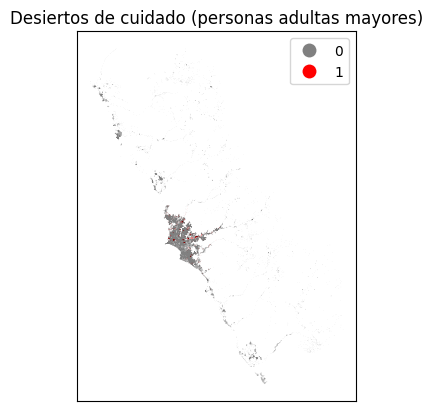

In [57]:
import matplotlib
#geopan = gpd.GeoDataFrame(df, geometry='geometry')

# Define a custom color map: red for 1, grey for 0
cmap = matplotlib.colors.ListedColormap(['grey', 'red'])

# Create a normalization object that maps your data values (0 and 1) to the colormap
norm = matplotlib.colors.BoundaryNorm([0, 0.5, 1], cmap.N)

fig, ax = plt.subplots(1, 1)

# Plot using the custom colormap and normalization
manzanas_am_recalc.plot(column='desierto_am_recalc', ax=ax, legend=True, categorical=True, cmap=cmap, norm=norm)

# Remove longitude and latitude ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Desiertos de cuidado (personas adultas mayores)')

# Save the figure with high resolution
plt.savefig('../figs/desiertos_de_cuidado_am60.png', format='png', dpi=1500)

plt.show()

In [58]:
manzanas_am_recalc.columns

Index(['geometry', 'T_TOTAL', 'pobma60_mz', 'distancia_a_centro_am',
       'duracion_a_centro_am', 'alta_demanda', 'desierto_am60', 'Mz', 'UBIGEO',
       'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A', 'area_manzana',
       'densidad_pob', 'combined_adjustment', 'adjusted_threshold',
       'desierto_2', 'desierto_am_recalc'],
      dtype='object')

In [59]:
manzanas_am_recalc = manzanas_am_recalc[['Mz', 'UBIGEO', 'AREA', 'CODCCPP',
       'ZONA', 'MANZANA_ID', 'MANZANA_A', 'geometry', 'pobma60_mz', 'distancia_a_centro_am',
       'duracion_a_centro_am', 'alta_demanda', 'desierto_am_recalc', 'adjusted_threshold']]

manzanas_am_recalc = manzanas_am_recalc.rename(columns={"adjusted_threshold": "umbral_t_dinamico"})

manzanas_am_recalc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 160645 entries, 0 to 160644
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Mz                     160645 non-null  object  
 1   UBIGEO                 160645 non-null  object  
 2   AREA                   160645 non-null  object  
 3   CODCCPP                160645 non-null  object  
 4   ZONA                   160645 non-null  object  
 5   MANZANA_ID             157887 non-null  object  
 6   MANZANA_A              58521 non-null   object  
 7   geometry               160645 non-null  geometry
 8   pobma60_mz             160645 non-null  float64 
 9   distancia_a_centro_am  154994 non-null  float64 
 10  duracion_a_centro_am   154994 non-null  float64 
 11  alta_demanda           160645 non-null  int32   
 12  desierto_am_recalc     160645 non-null  int32   
 13  umbral_t_dinamico      160645 non-null  float64 
dtypes: float64(4

In [60]:
manzanas_am_recalc.to_csv("../results - desiertos/desiertos_ajustados/desiertos_am_recalc.csv", index=False, sep=";", decimal=",")

manzanas_am_recalc.to_file("../results - desiertos/desiertos_ajustados/desiertos_am_recalc.geojson", driver='GeoJSON')